In [1]:
import math
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import numpy.random as random
from time import time

In [2]:
#Ex1, Q1
def uniforme(a,b):
    return a + (b-a)*random.rand()

In [3]:
#Ex1, Q2
def pointsuni(a,b,K):
    x = uniforme(a,b)
    y = uniforme(0,K)
    return x,y

In [4]:
#Ex1, Q3
def f(x):
    if (x<1 or x >2):
        0
    else:
        return (3/7)*x**2

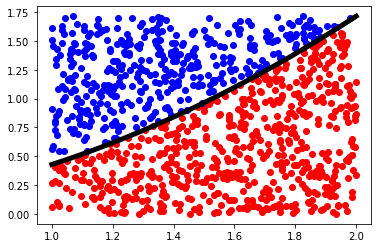

In [5]:
#Ex1, Q4
def nuagepoints(N,f,a,b,K):
    X = np.zeros(N)
    Y = np.zeros(N)
    
    for i in range(N):
        X[i] = uniforme(a,b)
        Y[i] = uniforme(0,K)
        if (f(X[i]) < Y[i]):
            plt.scatter(X[i], Y[i], color = 'blue')
        else:
            plt.scatter(X[i],Y[i],color = 'red')
            
    u = np.linspace(1,2,250)
    plt.plot(u,[f(x) for x in u], linewidth = 5, color = 'black')
    plt.show()

nuagepoints(1000,f,1,2,f(2))    

In [6]:
#Ex1, Q6
def pointrejet(f,a,b,K):
    Xm,Ym = pointsuni(a,b,K)
    while (f(Xm)<Ym):
        Xm,Ym = pointsuni(a,b,K)
    return Xm,Ym
#ou
def pointrejet(f,a,b,K):
    trouve=False
    while (not trouve):
        Xm,Ym = pointsuni(a,b,K)
        trouve = f(Xm) > Ym
    return Xm,Ym           

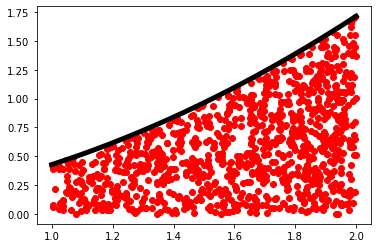

In [7]:
#EX1, Q7
def nuagespointsrejet(N,f,a,b,K):
    X = np.zeros(N)
    Y = np.zeros(N)
    
    for i in range(N):
        X[i], Y[i] = pointrejet(f,a,b,K)
        plt.scatter(X[i],Y[i],color = 'red')
            
    u = np.linspace(1,2,250)
    plt.plot(u,[f(x) for x in u], linewidth = 5, color = 'black')
    plt.show()

nuagespointsrejet(1000,f,1,2,f(2))    

In [8]:
def TraceFctEmpirique01(X,borne=0.):
    n = len(X)
    assert n>0
    Xsort = np.sort(X)
    plt.step([Xsort[0]-borne] + [a for a in Xsort] + [Xsort[-1]+borne],[0] + [a/n for a in range(n)] + [1])

#repartion de densite de f
def F(x): 
    return(x**3/7-1/7) 


In [9]:
#Ex1, Q8
def verification(N,f,a,b,K):
    XY=[pointrejet(f,a,b,K) for i in range(N)]
    X = [xy[0] for xy in XY]
    TraceFctEmpirique01(X)
    
    x=np.linspace(a,b,100)
    plt.plot(x,[F(i) for i in x],color='red',label="theorique")
    plt.legend()
    plt.show()
    

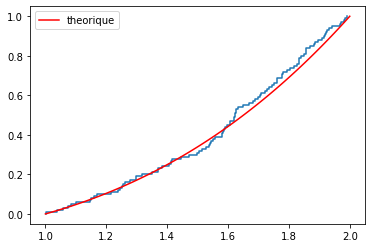

In [10]:
verification(100, f, 1,2,f(2))

In [11]:
#Ex02, Q1
def g(x): 
    return 1/2*math.exp(-abs(x))

def laplace():
    E=-math.log(random.rand())
    if(random.rand() < 0.5):
        Z = -1
    else:
        Z = 1
    return E*Z


In [12]:
#Ex02, Q2
K=2*np.exp(1/2)/np.sqrt(2*np.pi)
print(K)

1.315489246958914


In [13]:
#ex02, Q3
def points_domaine(N,simg,g,K):
    x = np.zeros(N)
    G = np.zeros(N)
    F = np.zeros(N)
    for i in range(N):
        x[i] = simg()
        G[i] = K*g(x[i])
        F[i] = random.rand()*G[i]
    plt.scatter(x,F)
    plt.show()

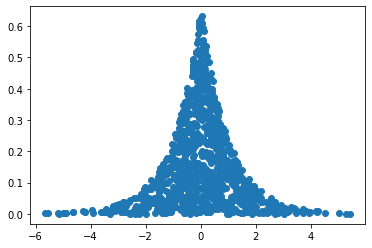

In [14]:
points_domaine(1000,laplace,g,K)

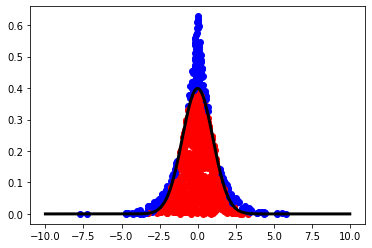

In [15]:
def f(x):
    return (1/math.sqrt(2*math.pi))*math.exp(-(x**2)/2)
    
def points_domaineBR(N,simg,g,K,f):
    x = np.zeros(N)
    G = np.zeros(N)
    F = np.zeros(N)
    for i in range(N):
        x[i] = simg()
        G[i] = K*g(x[i])
        F[i] = random.rand()*G[i]
        if(f(x[i])>F[i]):
            plt.scatter(x[i],F[i], color='r')
        else:
            plt.scatter(x[i],F[i], color='b')

points_domaineBR(1000,laplace,g,K,f)   
u = np.linspace(-10,10,250)
plt.plot(u,[f(x) for x in u], linewidth = 3, color = 'black')
plt.show()

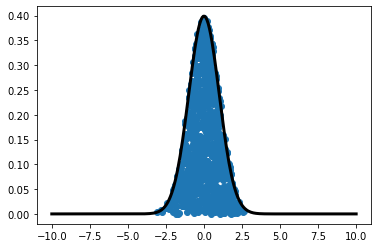

In [16]:
#Ex2, Q4
def rejet(simg,g,K,f):
    trouve = False
    while not trouve: 
        x=simg()
        u=random.rand()
        y = K*g(x)*u
        if(f(x) > y):
            trouve = True
    return (x, y)

F=[rejet(laplace,g,K,f) for i in range(1000)]
plt.scatter([i[0] for i in F],[i[1] for i in F])

u = np.linspace(-10,10,250)
plt.plot(u,[f(x) for x in u], linewidth = 3, color = 'black')
plt.show()



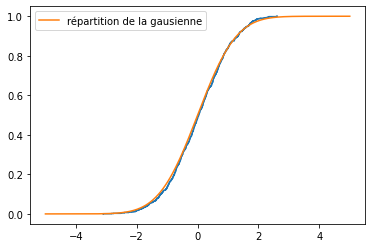

In [17]:
#ex2, Q5
x = [i[0] for i in F]
TraceFctEmpirique01(x)

x = np.linspace(-5,5,250)
plt.plot(x,scs.norm.cdf(x),label='répartition de la gausienne')
plt.legend()
plt.show()
